# Section 1.5 Warmup Assignment
* Generate linear regression data
* Find optimal model parameters using gradient descent
* Choose a good learning rate/ # of iterations
* Plot the loss per iteration

In [1]:
from dataclasses import dataclass

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
@dataclass(frozen=True)
class LinearParams:
    """Class for keeping track of linear regression parameters"""
    n_values: int = 100
    x_scaling: float = 100.
    x_offset: float = 0.
    slope: float = 5
    intercept: float = -20
    noise_mean: float = 0
    noise_std: float = 30
        
@dataclass(frozen=True)
class LinearData:
    """Class to track linear regression data"""
    x_values: np.array
    y_values: np.array
    y_noise: np.array
    params: LinearParams

In [12]:
def generate_data(params: LinearParams = LinearParams(), seed=10):
    np.random.seed(seed)
    actual_x = np.sort(np.random.rand(params.n_values, 1) * params.x_scaling, axis=0) + params.x_offset
    y_noise = np.random.normal(loc=params.noise_mean, scale=params.noise_std, size=(params.n_values, 1))
    actual_y = params.slope * actual_x + params.intercept + y_noise

    plt.plot(actual_x, actual_y, '.')
    plt.title('Generated Data')
    plt.xlabel('X vals')
    plt.ylabel('Y vals')
    plt.show()
    
    return LinearData(actual_x, actual_y, y_noise, params)

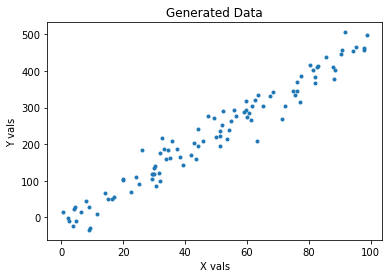

In [13]:
generated_data = generate_data()

In [14]:
generated_data.x_values[:10]

array([[0.39482663],
       [2.07519494],
       [2.53997821],
       [3.92817672],
       [3.99592087],
       [4.30973562],
       [4.68963194],
       [6.42510607],
       [7.96130902],
       [8.83398142]])

In [23]:
np.concatenate((np.ones((generated_data.params.n_values, 1)), generated_data.x_values), axis=1).shape

(100, 2)

In [51]:
class LinearRegressor:

    @classmethod
    def fit(cls, data: LinearData, learning_rate=0.2, iterations=100, seed=None):
        if seed is not None:
            np.random.seed(seed)
        X = np.concatenate((np.ones((data.params.n_values, 1)), data.x_values), axis=1)
        weights = np.random.rand(2, 1)
        
        #print(f'Starting weights: {weights}')

        mse = list()
        for i in range(iterations):
            predicted_y = X.dot(weights)
            error = cls._calculate_mse(data.y_values, predicted_y)
            mse.append(error)
            d_weight = cls._calculate_mse_gradient(data.y_values, X, weights)
            weights = weights - learning_rate*d_weight
            
            #print(f'rmse: {error} d_weight: {d_weight} weights: {weights}')
            
        plt.plot(np.arange(1, iterations+1), mse)
        plt.show()
            
        return weights, rmse
        
    @staticmethod
    def _calculate_mse(actual_y, predicted_y):
        return np.square(actual_y - predicted_y).mean()
    
    @staticmethod
    def _calculate_mse_gradient(actual_y, X, weights):
        return 2 * np.dot(X.T, (X.dot(weights) - actual_y)) / X.shape[0]

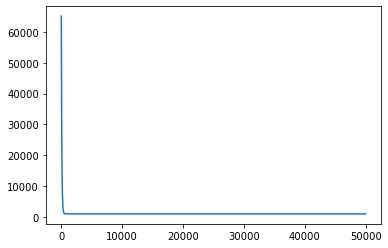

array([[0.16869628],
       [4.72359097]])

In [62]:
weights, rmse = LinearRegressor.fit(generated_data, iterations=50000, learning_rate=0.000001)
weights

Even though we try multiple times, it looks like this never really captures the correct y-intercept.  This seems to be largely because gradient descent is highly sensitive to starting values (and so, can get trapped in local minima; see for example, [this SO post](https://stackoverflow.com/questions/48688515/gradient-descent-algorithm-for-linear-regression-do-not-optmize-the-y-intercept)).  [The last answer](https://stackoverflow.com/a/48786574) in the SO post lists a strategy for picking the initial y-intercept parameter that seems to be much more successful.